In [4]:
import pandas as pd
import sys
import io
import numpy as np
import nltk
import pathlib
import re
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import TfidfTransformer
import glob

def class_list(feel_list):
    model_list = []
    for i in feel_list:
        if i < -0.33:        
            model_list.append('Negativo')
        elif i > 0.33:
            model_list.append('Positivo')
        else:
            model_list.append('Neutro')
    return model_list

In [33]:
str(pathlib.Path().absolute())

'/home/vitor/IncredibleBrazilianNewsWebscraper/Notebooks'

In [35]:
path = str(pathlib.Path().absolute())
df_list = []
for file in glob.glob(path+'/../Planilhas/IBM/IBM_*'):
    df_list.append(pd.read_csv(file)[['Título', 'Notícia', 'Link', 'Sentimento']])
    
final_df = pd.concat(df_list, ignore_index=True)
final_df

,Título,Notícia,Link,Sentimento
0,Quase metade dos mortos por coronavírus tinha ...,Oito dos 17 mortos em decorrência do coronavír...,https://epoca.globo.com/mundo/quase-metade-dos...,-0.310293
1,Coronavírus: Wuhan vira cidade fantasma em pri...,"Eram 10h desta quinta (23) em Wuhan, na China,...",https://epoca.globo.com/mundo/coronavirus-wuha...,-0.697220
2,Polícia Federal não tem protocolo para lidar c...,A Polícia Federal não tem nenhum protocolo par...,https://epoca.globo.com/guilherme-amado/polici...,-0.736620
3,Marco zero de coronavírus pode ser mercado que...,Um comércio popular de alimentos no centro da ...,https://epoca.globo.com/sociedade/marco-zero-d...,0.805775
4,"Para fugir de coronavírus, brasileiros saem da...","Aeroporto Internacional de Wuhan, madrugada de...",https://epoca.globo.com/sociedade/para-fugir-d...,-0.453230
...,...,...,...,...
21173,Vídeos de óvnis dos EUA: imagens capturadas po...,O Departamento de Defesa dos Estados Unidos re...,https://epoca.globo.com/mundo/videos-de-ovnis-...,0.300922
21174,Coronavírus: 'Bolsonaro não ouve ninguém e não...,"O mundo em pausa: pessoas confinadas, ruas mai...",https://epoca.globo.com/brasil/coronavirus-bol...,-0.457407
21175,Elena Landau e Nelson Marconi discutem o Plano...,"ELENA LANDAU, 61 anos, fluminenseO que faz e o...",https://epoca.globo.com/economia/elena-landau-...,-0.648775
21176,"Depois da Capes, governo corta bolsas também d...",Pouco depois de alterar regras de bolsas da Co...,https://epoca.globo.com/guilherme-amado/depois...,0.506700


In [15]:
final_df.drop_duplicates(subset ="Link", 
                     keep = 'first', inplace = True) 
final_df = final_df.reset_index(drop=True)[['Título', 'Notícia', 'Link', 'Sentimento', 'Modelo']]
final_df

,Título,Notícia,Link,Sentimento,Modelo
0,Itália decide fechar escolas e universidades a...,O governo italiano decidiu nesta quarta (4) fe...,https://www1.folha.uol.com.br/equilibrioesaude...,-0.716442,Negativo
1,IRB perde mais de R$ 24 bilhões com crise,O presidente do IRB Brasil RE (Instituto de Re...,https://www1.folha.uol.com.br/mercado/2020/03/...,-0.726587,Negativo
2,Instabilidade chega ao risco-país após afetar ...,"Desde o fim do Carnaval, a instabilidade nos m...",https://www1.folha.uol.com.br/mercado/2020/03/...,-0.528947,Negativo
3,"Estrangeiros tiram R$ 44,8 bi da Bolsa, maior ...","Até dia 4 de março, estrangeiros sacaram R$ 44...",https://www1.folha.uol.com.br/mercado/2020/03/...,-0.756982,Negativo
4,Coronavírus representa um torpedo direto contr...,A economia é um jogo de confiança. As empresas...,https://www1.folha.uol.com.br/mercado/2020/03/...,-0.375890,Negativo
5,Veja todas as vezes que a Bolsa brasileira aci...,"Desde 1997, quando o mecanismo de circuit brea...",https://www1.folha.uol.com.br/mercado/2020/03/...,-0.724118,Negativo
6,Trump planeja discutir com Congresso corte de ...,"O presidente dos Estados Unidos, Donald Trump,...",https://www1.folha.uol.com.br/mercado/2020/03/...,-0.784030,Negativo
7,Caixa Seguridade avalia suspender IPO,"A Caixa Seguridade, braço de seguros e previdê...",https://www1.folha.uol.com.br/mercado/2020/03/...,0.000000,Neutro
8,Bolsonaro minimiza crise e diz que coronavírus...,Diante do clima de pânico no mercado financeir...,https://www1.folha.uol.com.br/mercado/2020/03/...,-0.467385,Negativo
9,Clientes reclamam de instabilidade em corretor...,"Logo após a abertura da Bolsa de Valores, às 1...",https://www1.folha.uol.com.br/mercado/2020/03/...,-0.463598,Negativo


In [16]:
sent_list = list(final_df['Sentimento'])
final_classes = class_list(sent_list)
final_df['Modelo'] = final_classes
final_df

,Título,Notícia,Link,Sentimento,Modelo
0,Itália decide fechar escolas e universidades a...,O governo italiano decidiu nesta quarta (4) fe...,https://www1.folha.uol.com.br/equilibrioesaude...,-0.716442,Negativo
1,IRB perde mais de R$ 24 bilhões com crise,O presidente do IRB Brasil RE (Instituto de Re...,https://www1.folha.uol.com.br/mercado/2020/03/...,-0.726587,Negativo
2,Instabilidade chega ao risco-país após afetar ...,"Desde o fim do Carnaval, a instabilidade nos m...",https://www1.folha.uol.com.br/mercado/2020/03/...,-0.528947,Negativo
3,"Estrangeiros tiram R$ 44,8 bi da Bolsa, maior ...","Até dia 4 de março, estrangeiros sacaram R$ 44...",https://www1.folha.uol.com.br/mercado/2020/03/...,-0.756982,Negativo
4,Coronavírus representa um torpedo direto contr...,A economia é um jogo de confiança. As empresas...,https://www1.folha.uol.com.br/mercado/2020/03/...,-0.375890,Negativo
5,Veja todas as vezes que a Bolsa brasileira aci...,"Desde 1997, quando o mecanismo de circuit brea...",https://www1.folha.uol.com.br/mercado/2020/03/...,-0.724118,Negativo
6,Trump planeja discutir com Congresso corte de ...,"O presidente dos Estados Unidos, Donald Trump,...",https://www1.folha.uol.com.br/mercado/2020/03/...,-0.784030,Negativo
7,Caixa Seguridade avalia suspender IPO,"A Caixa Seguridade, braço de seguros e previdê...",https://www1.folha.uol.com.br/mercado/2020/03/...,0.000000,Neutro
8,Bolsonaro minimiza crise e diz que coronavírus...,Diante do clima de pânico no mercado financeir...,https://www1.folha.uol.com.br/mercado/2020/03/...,-0.467385,Negativo
9,Clientes reclamam de instabilidade em corretor...,"Logo após a abertura da Bolsa de Valores, às 1...",https://www1.folha.uol.com.br/mercado/2020/03/...,-0.463598,Negativo


In [17]:
final_df[final_df.Modelo=='Negativo'].count()

Título        8654
Notícia       8654
Link          8654
Sentimento    8654
Modelo        8654
dtype: int64

In [18]:
final_df[final_df.Modelo=='Neutro'].count()

Título        5187
Notícia       5187
Link          5187
Sentimento    5187
Modelo        5187
dtype: int64

In [19]:
final_df[final_df.Modelo=='Positivo'].count()

Título        4631
Notícia       4631
Link          4631
Sentimento    4631
Modelo        4631
dtype: int64

In [20]:
not_neutral_df = final_df[final_df.Modelo != 'Neutro'].sort_values(by=['Modelo']).reset_index(drop=True)
balanced_df = not_neutral_df[not_neutral_df.index > 4022].reset_index(drop=True)
balanced_df

,Título,Notícia,Link,Sentimento,Modelo
0,Conflito entre EUA e Irã não seria como a guer...,"A julgar pelas aparências, Estados Unidos e Ir...",https://www1.folha.uol.com.br/mundo/2019/05/co...,-0.658110,Negativo
1,Facebook eleva punições em resposta a massacre...,"O Facebook anunciou, em mensagem de seu vice-p...",https://www1.folha.uol.com.br/mundo/2019/05/fa...,-0.807634,Negativo
2,Bolsonaro diz que quer aplicar parte do fundo ...,O presidente Jair Bolsonaro disse nesta quinta...,https://www1.folha.uol.com.br/cotidiano/2019/0...,-0.510394,Negativo
3,"Folha não tem que contratar 'qualquer uma', di...",O presidente Jair Bolsonaro afirmou nesta quin...,https://www1.folha.uol.com.br/cotidiano/2019/0...,-0.544571,Negativo
4,"Na Índia, governo destina mais verba para bem-...",“O governo nunca vai deixar de honrar as vacas...,https://www1.folha.uol.com.br/mundo/2019/05/na...,-0.671399,Negativo
5,Como o Taleban se infiltrou na principal base ...,Alguns combatentes do Taleban se esconderam de...,https://www1.folha.uol.com.br/mundo/2019/05/co...,-0.760749,Negativo
6,"Em evento, Joana Félix diz que não deixará míd...",Em palestra esvaziada nesta sexta (17) em São ...,https://www1.folha.uol.com.br/cotidiano/2019/0...,-0.452723,Negativo
7,Empresa de munição criticada por filhos de Bol...,Na esteira do decreto de Jair Bolsonaro que fl...,https://www1.folha.uol.com.br/colunas/painelsa...,-0.892966,Negativo
8,Posições sobre Venezuela e comércio isolam Bra...,A situação na Venezuela e a reforma da Organiz...,https://www1.folha.uol.com.br/mundo/2019/05/po...,-0.671912,Negativo
9,Cibersegurança virou assunto nacional,Para além do choque das revelações do site jor...,https://www1.folha.uol.com.br/colunas/ronaldol...,-0.562258,Negativo


In [21]:
nt_only_df = final_df[final_df.Modelo=='Neutro'].reset_index(drop=True)
nt_balanced_df = pd.concat([balanced_df, nt_only_df[nt_only_df.index > 555]], ignore_index=True)
nt_balanced_df

,Título,Notícia,Link,Sentimento,Modelo
0,Conflito entre EUA e Irã não seria como a guer...,"A julgar pelas aparências, Estados Unidos e Ir...",https://www1.folha.uol.com.br/mundo/2019/05/co...,-0.658110,Negativo
1,Facebook eleva punições em resposta a massacre...,"O Facebook anunciou, em mensagem de seu vice-p...",https://www1.folha.uol.com.br/mundo/2019/05/fa...,-0.807634,Negativo
2,Bolsonaro diz que quer aplicar parte do fundo ...,O presidente Jair Bolsonaro disse nesta quinta...,https://www1.folha.uol.com.br/cotidiano/2019/0...,-0.510394,Negativo
3,"Folha não tem que contratar 'qualquer uma', di...",O presidente Jair Bolsonaro afirmou nesta quin...,https://www1.folha.uol.com.br/cotidiano/2019/0...,-0.544571,Negativo
4,"Na Índia, governo destina mais verba para bem-...",“O governo nunca vai deixar de honrar as vacas...,https://www1.folha.uol.com.br/mundo/2019/05/na...,-0.671399,Negativo
5,Como o Taleban se infiltrou na principal base ...,Alguns combatentes do Taleban se esconderam de...,https://www1.folha.uol.com.br/mundo/2019/05/co...,-0.760749,Negativo
6,"Em evento, Joana Félix diz que não deixará míd...",Em palestra esvaziada nesta sexta (17) em São ...,https://www1.folha.uol.com.br/cotidiano/2019/0...,-0.452723,Negativo
7,Empresa de munição criticada por filhos de Bol...,Na esteira do decreto de Jair Bolsonaro que fl...,https://www1.folha.uol.com.br/colunas/painelsa...,-0.892966,Negativo
8,Posições sobre Venezuela e comércio isolam Bra...,A situação na Venezuela e a reforma da Organiz...,https://www1.folha.uol.com.br/mundo/2019/05/po...,-0.671912,Negativo
9,Cibersegurança virou assunto nacional,Para além do choque das revelações do site jor...,https://www1.folha.uol.com.br/colunas/ronaldol...,-0.562258,Negativo


In [22]:
noticias_finais = balanced_df['Notícia'].values
classes_finais = balanced_df['Modelo'].values

vectorizer = CountVectorizer(analyzer="word", stop_words = set(stopwords.words('portuguese') + list(punctuation)))
freq_news = vectorizer.fit_transform(noticias_finais) #frequencia de todas as palavras nas noticias
#tf_idf = TfidfTransformer(use_idf=False)
#news_tf_idf = tf_idf.fit_transform(freq_news)
modelo = MultinomialNB()
modelo.fit(freq_news, classes_finais)




MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
vectorizer.vocabulary_.get(u'ser')

104626

In [29]:
sum_words = freq_news.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
lista = sorted(words_freq, key = lambda x: x[1], reverse=True)
lista[0]




('ser', 14480)

In [30]:
dat = pd.DataFrame(lista, columns = ['Palavra', "Frequência"])
dat

,Palavra,Frequência
0,ser,14480
1,sobre,11958
2,presidente,11120
3,anos,11036
4,pessoas,10316
5,ainda,10016
6,brasil,9715
7,disse,9528
8,governo,9160
9,bolsonaro,8750


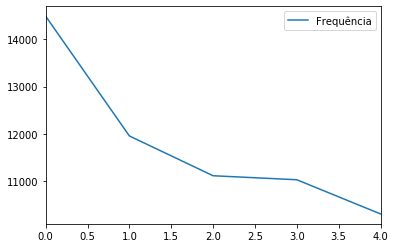

In [28]:
dat.head(5).plot()

In [178]:
testes = ['Nesta sexta-feira, 1º de maio, em que o mundo ainda espera uma solução para a pandemia que nos ameaça, o Globo Repórter homenageou os incansáveis trabalhadores da ciência. Determinados e curiosos, eles não têm medo de correr riscos na busca do conhecimento, como pudemos ver revivendo uma extraordinária expedição científica às Ilhas Galápagos. Quando Charles Darwin publicou o seu célebre Origem das Espécies, há 160 anos, não imaginou que esse arquipélago fascinante ainda surpreenderia gerações de cientistas. No século 21, equipados com submarinos e helicópteros, eles vasculham o fundo do mar, alcançam o topo das montanhas vulcânicas, chegam a lugares onde o homem nunca esteve e encontram novas, desconhecidas espécies. No documentário Missão Galápagos, produzido pela BBC e exibido com exclusividade na TV aberta do Brasil pelo Globo Repórter, você vê algumas delas e nada junto com cientistas no meio do maior cardume de tubarões martelo do mundo. Assista ao programa completo acima.',
         'Estou muito feliz com o governo de Minas esse ano',
         'O estado de Minas Gerais decretou calamidade financeira!!!',
         'A segurança desse país está maravilhosa',
         'O governador de Minas é do PT']
freq_testes = vectorizer.transform(testes)
modelo.predict(freq_testes)

array(['Positivo', 'Positivo', 'Negativo', 'Positivo', 'Negativo'],
      dtype='<U8')

In [182]:
resultados = cross_val_predict(modelo, freq_news, classes_finais, cv=10) # cv = 10 significa que os dados serão divididos em 10 partes
metrics.accuracy_score(classes_finais,resultados)

0.7959732988802756

In [164]:
print (pd.crosstab(classes_finais, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Positivo   All
Real                              
Negativo      3960       684  4644
Positivo      1211      3433  4644
All           5171      4117  9288


In [181]:
sentimento=['Positivo','Negativo']
print (metrics.classification_report(classes_finais,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.83      0.74      0.78      4644
    Negativo       0.77      0.85      0.81      4644

    accuracy                           0.80      9288
   macro avg       0.80      0.80      0.80      9288
weighted avg       0.80      0.80      0.80      9288



In [165]:
# testando naiva bayes com "bigrams", isto é, em vez de classificar uma palavra por vez, classifica conjuntos de duas palavras
vectorizer = CountVectorizer(ngram_range=(1,2))
freq_news = vectorizer.fit_transform(noticias_finais)
modelo = MultinomialNB()
modelo.fit(freq_news,classes_finais)
resultados = cross_val_predict(modelo, freq_news, classes_finais, cv=10)
metrics.accuracy_score(classes_finais,resultados)


0.8086778639104221

In [166]:

noticias = final_df['Notícia'].values
classes = final_df['Modelo'].values
vectorizer = CountVectorizer(analyzer="word")
freq_news = vectorizer.fit_transform(noticias) #frequencia de todas as palavras nas noticias
modelo = MultinomialNB()
modelo.fit(freq_news, classes)
resultados = cross_val_predict(modelo, freq_news, classes, cv=10)
metrics.accuracy_score(classes,resultados)


0.596326445418493

In [167]:
# testando naiva bayes com "bigrams" pra todas as notícias
vectorizer = CountVectorizer(ngram_range=(1,2))
freq_news = vectorizer.fit_transform(noticias)
modelo = MultinomialNB()
modelo.fit(freq_news,classes)
resultados = cross_val_predict(modelo, freq_news, classes, cv=10)
metrics.accuracy_score(classes,resultados)

0.6198601544562722

In [168]:

noticias = not_neutral_df['Notícia'].values
classes = not_neutral_df['Modelo'].values
vectorizer = CountVectorizer(analyzer="word")
freq_news = vectorizer.fit_transform(noticias) #frequencia de todas as palavras nas noticias
modelo = MultinomialNB()
modelo.fit(freq_news, classes)
resultados = cross_val_predict(modelo, freq_news, classes, cv=10)
metrics.accuracy_score(classes,resultados)

0.7894095729435369

In [41]:
feel_list = df_folha['Sentimento']
feel_list

0      0.692049
1      0.818539
2      0.701425
3      0.701425
4     -0.587995
5     -0.667102
6      0.000000
7     -0.737656
8     -0.390678
9      0.000000
10     0.505398
11    -0.516046
12     0.000000
13     0.413686
14    -0.478098
15     0.000000
16    -0.879594
17    -0.758574
18     0.000000
19    -0.442824
20    -0.633748
21    -0.651931
22    -0.648574
23     0.000000
24     0.000000
25    -0.492939
26     0.000000
27    -0.740695
28    -0.580675
29    -0.560776
         ...   
274    0.895836
275    0.000000
276   -0.908120
277   -0.294999
278    0.000000
279   -0.353968
280   -0.586748
281   -0.387185
282    0.763483
283   -0.514428
284   -0.643793
285   -0.767754
286   -0.697071
287   -0.495446
288   -0.287821
289   -0.538758
290   -0.308035
291   -0.697777
292   -0.368782
293    0.000000
294    0.000000
295   -0.524754
296    0.000000
297    0.000000
298    0.000000
299   -0.657507
300    0.000000
301    0.000000
302   -0.557823
303    0.000000
Name: Sentimento, Length

In [42]:
model_list = class_list(feel_list)

model_list
    

['Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Negativo',
 'Negativo',
 'Neutro',
 'Negativo',
 'Negativo',
 'Neutro',
 'Positivo',
 'Negativo',
 'Neutro',
 'Positivo',
 'Negativo',
 'Neutro',
 'Negativo',
 'Negativo',
 'Neutro',
 'Negativo',
 'Negativo',
 'Negativo',
 'Negativo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Negativo',
 'Negativo',
 'Negativo',
 'Positivo',
 'Negativo',
 'Negativo',
 'Negativo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Positivo',
 'Neutro',
 'Negativo',
 'Positivo',
 'Negativo',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Negativo',
 'Negativo',
 'Negativo',
 'Positivo',
 'Positivo',
 'Neutro',
 'Negativo',
 'Negativo',
 'Negativo',
 'Negativo',
 'Positivo',
 'Neutro',
 'Negativo',
 'Negativo',
 'Negativo',
 'Negativo',
 'Negativo',
 'Negativo',
 'Neutro',
 'Negativo',
 'Negativo',
 'Positivo',
 'Positivo',
 'Neutro',
 'Negativo',
 'Neutro',
 'Negativo',
 'Negativo',
 'Negativo',
 'Negativo',
 'Ne

In [43]:
df_folha['Modelo'] = model_list
df_folha[['Título', 'Notícia', 'Data', 'Link', 'Sentimento', 'Modelo']]


,Título,Notícia,Data,Link,Sentimento,Modelo
0,Turismo voltado à valorização da cultura negra,"Se conectar com a memória, fortalecer as ident...",2018-11-19,https://epoca.globo.com/turismo-voltado-valori...,0.692049,Positivo
1,Os melhores do turismo,A baixa exploração do potencial turístico do B...,2018-12-14,https://epoca.globo.com/os-melhores-do-turismo...,0.818539,Positivo
2,Como declaração de Guedes irrita ex-ministro d...,"Durante sua posse na semana passada, o ministr...",2019-01-07,https://epoca.globo.com/expresso/como-declarac...,0.701425,Positivo
3,A sugestão do ministro do Turismo para a crise...,A crise de segurança pública no Ceará foi um d...,2019-01-09,https://epoca.globo.com/expresso/a-sugestao-do...,0.701425,Positivo
4,Os planos do chanceler para os 100 primeiros d...,"Os diplomatas estão atônitos, os militares des...",2019-01-12,https://epoca.globo.com/os-planos-do-chanceler...,-0.587995,Negativo
5,"""Parece que nunca aprendemos"", disse pesquisad...",Três anos após o rompimento de uma barragem qu...,2019-01-25,https://epoca.globo.com/parece-que-nunca-apren...,-0.667102,Negativo
6,Apoiadores de Bolsonaro comemoram exoneração d...,Apoiadores de Jair Bolsonaro no Facebook comem...,2019-02-06,https://epoca.globo.com/guilherme-amado/apoiad...,0.000000,Neutro
7,Deputado veste a camisa de advogado do ministr...,"O deputado Julian Lemos, do PSL da Paraíba, es...",2019-02-07,https://epoca.globo.com/guilherme-amado/deputa...,-0.737656,Negativo
8,"""Fim do visto seria uma excelente notícia"", di...","Em viagem a Washington na semana que vem, Bols...",2019-03-15,https://epoca.globo.com/fim-do-visto-seria-uma...,-0.390678,Negativo
9,Votações na Câmara mostram isolamento de minis...,Mesmo com a crise aberta entre Executivo e Leg...,2019-03-27,https://epoca.globo.com/guilherme-amado/votaco...,0.000000,Neutro


In [44]:
df_folha[df_folha.Modelo=='Neutro'].count()

Título        107
Notícia       107
Data          107
Link          107
Sentimento    107
Modelo        107
dtype: int64

In [45]:
df_folha[df_folha.Modelo=='Negativo'].count()

Título        155
Notícia       155
Data          155
Link          155
Sentimento    155
Modelo        155
dtype: int64

In [46]:
df_folha[df_folha.Modelo=='Positivo'].count()

Título        42
Notícia       42
Data          42
Link          42
Sentimento    42
Modelo        42
dtype: int64

In [9]:
noticias = df_folha['Notícia'].values
classes = df_folha['Modelo'].values
for i in noticias:
    i = i.replace('\u200b', '')
df_folha['Notícia'] = list(noticias)
noticias[0]


'\u200b\u200bA \u200bministra Rosa Weber, do STF (Supremo Tribunal Federal), solicitou que a Advocacia-Geral da União (AGU) apresente, em 30 dias, dados sobre o impacto do teto de gastos no combate à crise do coronavírus. A ação vem em resposta ao reforço de concessão de liminar enviado pelo PSOL na semana passada. Em 2017, a sigla ajuizou uma Ação Direta de Inconstitucionalidade contestando a emenda. No ofício encaminhado, o PSOL pediu celeridade na análise do processo para que sejam remanejados recursos públicos para ações contra a Covid-19. Nesta segunda (23), o partido solicitará uma redução no prazo concedido por Weber à AGU. A editora-chefe da Vogue americana, Anna Wintour, as atrizes Reese Witherspoon e Laura Dern e a modelo Izabel Goulart seguem orientações das autoridades de saúde e ficam em suas casas, ou mantém distâncias recomendadas, durante pandemia do novo coronavírus.com BRUNO B. SORAGGI, BIANKA VIEIRA e VICTORIA AZEVEDO'

In [10]:
vectorizer = CountVectorizer(analyzer="word")
freq_news = vectorizer.fit_transform(noticias) #frequencia de todas as palavras nas noticias
modelo = MultinomialNB()
modelo.fit(freq_news, classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
testes = ['Nesta sexta-feira, 1º de maio, em que o mundo ainda espera uma solução para a pandemia que nos ameaça, o Globo Repórter homenageou os incansáveis trabalhadores da ciência. Determinados e curiosos, eles não têm medo de correr riscos na busca do conhecimento, como pudemos ver revivendo uma extraordinária expedição científica às Ilhas Galápagos. Quando Charles Darwin publicou o seu célebre Origem das Espécies, há 160 anos, não imaginou que esse arquipélago fascinante ainda surpreenderia gerações de cientistas. No século 21, equipados com submarinos e helicópteros, eles vasculham o fundo do mar, alcançam o topo das montanhas vulcânicas, chegam a lugares onde o homem nunca esteve e encontram novas, desconhecidas espécies. No documentário Missão Galápagos, produzido pela BBC e exibido com exclusividade na TV aberta do Brasil pelo Globo Repórter, você vê algumas delas e nada junto com cientistas no meio do maior cardume de tubarões martelo do mundo. Assista ao programa completo acima.',
         'Estou muito feliz com o governo de Minas esse ano',
         'O estado de Minas Gerais decretou calamidade financeira!!!',
         'A segurança desse país está deixando a desejar',
         'O governador de Minas é do PT']
freq_testes = vectorizer.transform(testes)
modelo.predict(freq_testes)

array(['Positivo', 'Negativo', 'Negativo', 'Negativo', 'Negativo'],
      dtype='<U8')

In [12]:
resultados = cross_val_predict(modelo, freq_news, classes, cv=10) # cv = 10 significa que os dados serão divididos em 10 partes

In [13]:
metrics.accuracy_score(classes,resultados)

0.6788856304985337

In [14]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento),'')

              precision    recall  f1-score   support

    Positivo       0.48      0.35      0.40       441
    Negativo       0.74      0.88      0.80      2200
      Neutro       0.48      0.29      0.36       769

    accuracy                           0.68      3410
   macro avg       0.57      0.51      0.52      3410
weighted avg       0.65      0.68      0.65      3410
 


In [15]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo      1940     171        89  2200
Neutro         468     221        80   769
Positivo       220      67       154   441
All           2628     459       323  3410


In [16]:
# testando naiva bayes com "bigrams", isto é, em vez de classificar uma palavra por vez, classifica conjuntos de duas palavras
vectorizer = CountVectorizer(ngram_range=(1,2))
freq_news = vectorizer.fit_transform(noticias)
modelo = MultinomialNB()
modelo.fit(freq_news,classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
resultados = cross_val_predict(modelo, freq_news, classes, cv=10)
metrics.accuracy_score(classes,resultados)

0.673900293255132

In [23]:
# a acurácia piorou
modelo.predict(freq_news)

array(['Neutro', 'Negativo', 'Negativo', ..., 'Negativo', 'Negativo',
       'Negativo'], dtype='<U8')

In [22]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.61      0.17      0.27       441
    Negativo       0.68      0.98      0.80      2200
      Neutro       0.59      0.08      0.14       769

    accuracy                           0.67      3410
   macro avg       0.62      0.41      0.40      3410
weighted avg       0.65      0.67      0.58      3410



In [23]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo      2161      19        20  2200
Neutro         679      60        30   769
Positivo       341      23        77   441
All           3181     102       127  3410
